# NSCLS CNN 

This notebook aims to import NSCLS images and perform deep learning with Keras CNN


## Import images

In [1]:
import os, sys
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

TensorFlow version: 2.2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512)
(512, 512, 3)


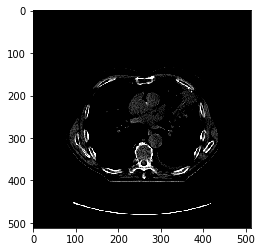

In [12]:
im = imageio.imread("~/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-69331/0.000000-82046/1-067.dcm")
print(im.shape)
def show_image(image, title = "Image", cmap_type = "rainbow"):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()
    
#show_image(im)
#print(im.meta.keys())
imRGB = color.gray2rgb(im)
print(imRGB.shape)
#show_image(imRGB)
plt.imshow(imRGB)
plt.show()

## Select middle slice for a single subject

['1-127.dcm', '1-115.dcm', '1-068.dcm', '1-035.dcm']
134
135
67.5
67
100


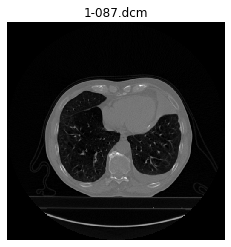

In [3]:
mypath = '/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-69331/0.000000-82046/'
myfiles = os.listdir(mypath)

print(myfiles[1:5])
print(len(myfiles))
print(len(myfiles)+1) #what if there was an odd number of files?
print((len(myfiles) + 1)/2) #Cant index with float
print(int((len(myfiles)+1)/2)) #this works
print(int(100.8)) #not round, drops

index_mid = int(len(myfiles)/2)
im = imageio.imread(mypath + myfiles[index_mid])
show_image(im, title = myfiles[index_mid])

## Loop through subject directories and select middle slice

Different subfolder names. Must collect that information programmatically. 

dir1
['LUNG1-001', 'LUNG1-002', 'LUNG1-003', 'LUNG1-004', 'LUNG1-005', 'LUNG1-006', 'LUNG1-007', 'LUNG1-008', 'LUNG1-009', 'LUNG1-010', 'LUNG1-011', 'LUNG1-012', 'LUNG1-013', 'LUNG1-014', 'LUNG1-015', 'LUNG1-016', 'LUNG1-017', 'LUNG1-018', 'LUNG1-019', 'LUNG1-020', 'LUNG1-021', 'LUNG1-022', 'LUNG1-023', 'LUNG1-024', 'LUNG1-025', 'LUNG1-026', 'LUNG1-027', 'LUNG1-028', 'LUNG1-029', 'LUNG1-030', 'LUNG1-031', 'LUNG1-032', 'LUNG1-033', 'LUNG1-034', 'LUNG1-035', 'LUNG1-036', 'LUNG1-037', 'LUNG1-038', 'LUNG1-039', 'LUNG1-040', 'LUNG1-041', 'LUNG1-042', 'LUNG1-043', 'LUNG1-044', 'LUNG1-045', 'LUNG1-046', 'LUNG1-047', 'LUNG1-048', 'LUNG1-049', 'LUNG1-050', 'LUNG1-051', 'LUNG1-052', 'LUNG1-053', 'LUNG1-054', 'LUNG1-055', 'LUNG1-056', 'LUNG1-057', 'LUNG1-058', 'LUNG1-059', 'LUNG1-060', 'LUNG1-061', 'LUNG1-062', 'LUNG1-063', 'LUNG1-064', 'LUNG1-065', 'LUNG1-066', 'LUNG1-067', 'LUNG1-068', 'LUNG1-069', 'LUNG1-070', 'LUNG1-071', 'LUNG1-072', 'LUNG1-073', 'LUNG1-074', 'LUNG1-075', 'LUNG1-076', 'LUNG1

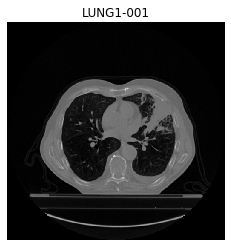

TransferSyntaxUID:1.2.840.10008.1.2.1
SOPClassUID:1.2.840.10008.5.1.4.1.1.2
SOPInstanceUID:1.3.6.1.4.1.32722.99.99.151297313025739782048297900262804225211
StudyDate:20080918
SeriesDate:20080918
AcquisitionDate:20080918
ContentDate:20080918
StudyTime:110915.625000 
SeriesTime:121748.328000 
AcquisitionTime:113913.221729 
ContentTime:113913.221729 
Modality:CT
Manufacturer:SIEMENS
PatientName:2342949070
PatientID:LUNG1-001
PatientBirthDate:
PatientSex:M 
PatientAge:083Y
PatientWeight:72.0
StudyInstanceUID:1.3.6.1.4.1.32722.99.99.239341353911714368772597187099978969331
SeriesInstanceUID:1.3.6.1.4.1.32722.99.99.298991776521342375010861296712563382046
SeriesNumber:0
AcquisitionNumber:2
InstanceNumber:68
ImagePositionPatient:(-249.51171875, -460.51171875, -483.5)
ImageOrientationPatient:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
SamplesPerPixel:1
Rows:512
Columns:512
PixelSpacing:(0.9765625, 0.9765625)
BitsAllocated:16
BitsStored:16
HighBit:15
PixelRepresentation:0
RescaleIntercept:-1024.0
RescaleSlope:

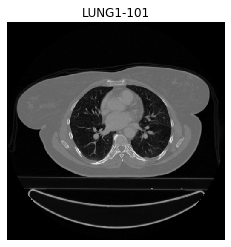

TransferSyntaxUID:1.2.840.10008.1.2
SOPClassUID:1.2.840.10008.5.1.4.1.1.2
SOPInstanceUID:1.3.6.1.4.1.32722.99.99.332918511026060258129452393751071669126
StudyDate:20060315
StudyTime:104716.406000 
Modality:CT
Manufacturer:CMS, Inc.
PatientName:7582852021
PatientID:LUNG1-101
PatientBirthDate:
PatientSex:F 
StudyInstanceUID:1.3.6.1.4.1.32722.99.99.218161928384440076179761610620026527911
SeriesInstanceUID:1.3.6.1.4.1.32722.99.99.46077837869307152750933906878546855665
SeriesNumber:1
AcquisitionNumber:
InstanceNumber:57
ImagePositionPatient:(-250.112, -250.112, -564.9)
ImageOrientationPatient:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
SamplesPerPixel:1
Rows:512
Columns:512
PixelSpacing:(0.977, 0.977)
BitsAllocated:16
BitsStored:16
HighBit:15
PixelRepresentation:1
RescaleIntercept:0.0
RescaleSlope:1.0
PixelData:b'Data converted to numpy array, raw data removed to preserve memory'
shape:(512, 512)
sampling:(0.977, 0.977)


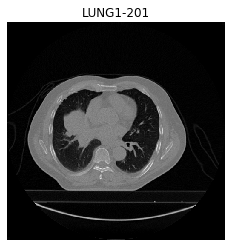

TransferSyntaxUID:1.2.840.10008.1.2
SOPClassUID:1.2.840.10008.5.1.4.1.1.2
SOPInstanceUID:1.3.6.1.4.1.32722.99.99.62629295899083222824606191832622532221
StudyDate:20070910
StudyTime:104614.718000 
Modality:CT
Manufacturer:CMS, Inc.
PatientName:1543461980
PatientID:LUNG1-201
PatientBirthDate:
PatientSex:M 
StudyInstanceUID:1.3.6.1.4.1.32722.99.99.248754105919779739515746109465423460967
SeriesInstanceUID:1.3.6.1.4.1.32722.99.99.266209514014035887588998199271209420062
SeriesNumber:1
AcquisitionNumber:
InstanceNumber:68
ImagePositionPatient:(-250.112, -250.112, -485.0)
ImageOrientationPatient:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
SamplesPerPixel:1
Rows:512
Columns:512
PixelSpacing:(0.977, 0.977)
BitsAllocated:16
BitsStored:16
HighBit:15
PixelRepresentation:1
RescaleIntercept:0.0
RescaleSlope:1.0
PixelData:b'Data converted to numpy array, raw data removed to preserve memory'
shape:(512, 512)
sampling:(0.977, 0.977)


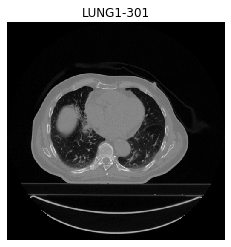

TransferSyntaxUID:1.2.840.10008.1.2.1
SOPClassUID:1.2.840.10008.5.1.4.1.1.2
SOPInstanceUID:1.3.6.1.4.1.32722.99.99.229202704080945612207061618387795968116
StudyDate:20081002
SeriesDate:20081002
AcquisitionDate:20081002
ContentDate:20081002
StudyTime:154513.125000 
SeriesTime:163833.343000 
AcquisitionTime:155606.564681 
ContentTime:155606.564681 
Modality:CT
Manufacturer:SIEMENS
PatientName:1539679036
PatientID:LUNG1-301
PatientBirthDate:
PatientSex:M 
PatientAge:081Y
PatientWeight:72.5
StudyInstanceUID:1.3.6.1.4.1.32722.99.99.145103036002169229376566246140236722497
SeriesInstanceUID:1.3.6.1.4.1.32722.99.99.275374943923580387037029966754393123718
SeriesNumber:0
AcquisitionNumber:3
InstanceNumber:60
ImagePositionPatient:(-249.51171875, -429.51171875, -481.0)
ImageOrientationPatient:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
SamplesPerPixel:1
Rows:512
Columns:512
PixelSpacing:(0.9765625, 0.9765625)
BitsAllocated:16
BitsStored:16
HighBit:15
PixelRepresentation:0
RescaleIntercept:-1024.0
RescaleSlope:

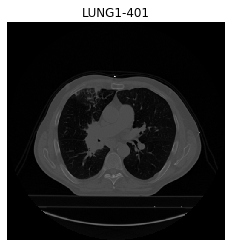

TransferSyntaxUID:1.2.840.10008.1.2.1
SOPClassUID:1.2.840.10008.5.1.4.1.1.2
SOPInstanceUID:1.3.6.1.4.1.32722.99.99.229017683989954301833851201638698040976
StudyDate:20100521
SeriesDate:20100521
AcquisitionDate:20100521
ContentDate:20100521
StudyTime:102133.109000 
SeriesTime:111547.984000 
AcquisitionTime:111143.584811 
ContentTime:111143.584811 
Modality:CT
Manufacturer:SIEMENS
PatientName:2970316441
PatientID:LUNG1-401
PatientBirthDate:
PatientSex:M 
PatientAge:058Y
PatientWeight:82.0
StudyInstanceUID:1.3.6.1.4.1.32722.99.99.270210390546167243599316128636641521105
SeriesInstanceUID:1.3.6.1.4.1.32722.99.99.262928140562125052042704588987827281445
SeriesNumber:0
AcquisitionNumber:2
InstanceNumber:68
ImagePositionPatient:(-249.51171875, -456.51171875, -504.5)
ImageOrientationPatient:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
SamplesPerPixel:1
Rows:512
Columns:512
PixelSpacing:(0.9765625, 0.9765625)
BitsAllocated:16
BitsStored:12
HighBit:11
PixelRepresentation:0
RescaleIntercept:-1024.0
RescaleSlope:

In [4]:
mypath1 = '/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/'
dir1 = os.listdir(mypath1)
dir1.sort()

print("dir1")
print(dir1)

images = []

#loop through dir 1
for myindex, mydir in enumerate(dir1):
    mypath2 = mypath1 + mydir
    dir2 = os.listdir(mypath2)
    if len(dir2) == 1:
        mypath3 = mypath2 + "/" + dir2[0]
    else:
        mypath3 = mypath2 + "/" + dir2[0]
        print(mydir + "contains more than one dir2")
    dir3 = os.listdir(mypath3)
    if len(dir3) == 1:
        mypath4 = mypath3 + "/" + dir3[0]
    else:
        mypath4 = mypath3 + "/" + dir3[0]
        print(mydir + "contains more than one dir3")
    myfiles = os.listdir(mypath4)
    myfiles.sort()
    index_mid = int(len(myfiles)/2)
    im = imageio.imread(mypath4 + "/" + myfiles[index_mid])
    images.append(im)
    if myindex % 100 == 0:
        show_image(im, title = mydir)
        for key in im.meta.keys():
            print(key + ":" + str(im.meta[key]))

print(len(images))
print(images[0].shape)


## Import phenotype file

Sort to be same order as images

Create train, test, validation

422
range(0, 422)
            ID  imageOrder
0    LUNG1-001           1
1    LUNG1-002           2
2    LUNG1-003           3
3    LUNG1-004           4
4    LUNG1-005           5
..         ...         ...
417  LUNG1-418         418
418  LUNG1-419         419
419  LUNG1-420         420
420  LUNG1-421         421
421  LUNG1-422         422

[422 rows x 2 columns]
     PatientID      age  clinical.T.Stage  Clinical.N.Stage  Clinical.M.Stage  \
0    LUNG1-001  78.7515               2.0                 3                 0   
1    LUNG1-002  83.8001               2.0                 0                 0   
2    LUNG1-003  68.1807               2.0                 3                 0   
3    LUNG1-004  70.8802               2.0                 1                 0   
4    LUNG1-005  80.4819               4.0                 2                 0   
..         ...      ...               ...               ...               ...   
417  LUNG1-418  53.6712               2.0                 0        

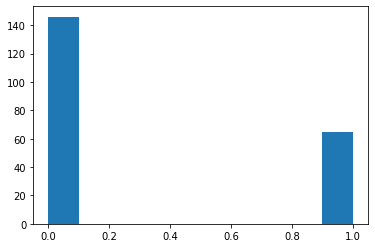

In [5]:
mypath1 = '/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/'
dir1 = os.listdir(mypath1)
dir1.sort()
print(len(dir1))
print(range(len(dir1)))
myorder = []
for i in range(len(dir1)):
    myorder.append(i+1)
#Create a dict 
imageIDs = {"ID": dir1, "imageOrder":myorder}
imageIDDF = pd.DataFrame(imageIDs)
print(imageIDDF)

dat = pd.read_csv("~/shared/sfcc/shared_data/NSCLS/data/text/Lung1.csv")
print(dat)

dat = pd.merge(dat, imageIDDF, how = "inner", left_on = "PatientID", right_on = "ID")
dat.sort_values(by='imageOrder')
print(dat.shape)
print(dat)
#pd.plotting.scatter_matrix(dat.iloc[:,[1, 8]], figsize = [8,8], s = 150, marker = "D")
dat.describe()
print(dat["clinical.T.Stage"].unique())
print(dat["Clinical.N.Stage"].unique())
print(dat["Clinical.M.Stage"].unique())
print(dat["Overall.Stage"].unique())
print(dat.gender.unique())
print(dat["gender"].value_counts())
dat.gender.replace(to_replace="male", value="0", inplace=True)
dat.gender.replace(to_replace="female", value="1", inplace=True)
dat["gender"] = dat["gender"].astype(int)

#dat["gender"].plot.hist()

imageNP = np.asarray(images)
imageNP = np.reshape(imageNP, (422, 512, 512, 1))

y = dat["gender"].values

images_train, images_test, y_train, y_test = train_test_split(imageNP, y, 
                                                    test_size = 0.5, 
                                                    random_state = 42)
print("shape of y train")
print(y_train.shape)
print("shape of images train")
print(images_train.shape)
print("shape of first image")
print(images_train[0].shape)
print(images_train[0].shape[0])
print(images_train[0].shape[1])
plt.hist(y_train)
plt.show()


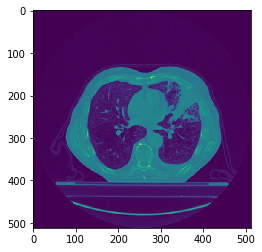

(512, 512, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


stacked image
(512, 512, 3)


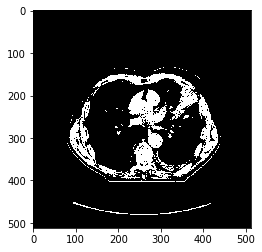

In [16]:
#imageNP = np.reshape(imageNP, (422, 512, 512, 3))

img = imageNP[0,:,:,:]
img2 = np.reshape(img, (512, 512))
plt.imshow(img2)
plt.show()
print(img.shape)
width = 512
height = 512
nchannels = 3
stacked_img = np.zeros((width,height,nchannels))
for ch in range(nchannels):
    for xx in range(height):
        for yy in range(width):
            stacked_img[xx,yy,ch] = img[xx,yy]

print("stacked image")
print(stacked_img.shape)
plt.imshow(stacked_img)
plt.show()

In [39]:
#imageNP = np.reshape(imageNP, (422, 512, 512, 3))

img = np.reshape(imageNP[0,:,:], (512,512))
print(img.shape)
arr = np.expand_dims(img, axis=2)
arr = np.concatenate((arr,arr,arr), axis=2)
print(arr.shape)
help(np.dstack)

(512, 512)
(512, 512, 3)
Help on function dstack in module numpy:

dstack(tup)
    Stack arrays in sequence depth wise (along third axis).
    
    This is equivalent to concatenation along the third axis after 2-D arrays
    of shape `(M,N)` have been reshaped to `(M,N,1)` and 1-D arrays of shape
    `(N,)` have been reshaped to `(1,N,1)`. Rebuilds arrays divided by
    `dsplit`.
    
    This function makes most sense for arrays with up to 3 dimensions. For
    instance, for pixel-data with a height (first axis), width (second axis),
    and r/g/b channels (third axis). The functions `concatenate`, `stack` and
    `block` provide more general stacking and concatenation operations.
    
    Parameters
    ----------
    tup : sequence of arrays
        The arrays must have the same shape along all but the third axis.
        1-D or 2-D arrays must have the same shape.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays, will be at l

## Run a keras model

In [6]:
# Create a Sequential model
model = Sequential()

# Add an input layer connected to all pixels in input image
# There are 211 input B&W images of 512x512 pixels
# train_data.shape
# (211, 512, 512)
# input layer is 262144 (512x512). Connected to every pixel. 
#and a hidden layer with 3 neurons
model.add(Conv2D(10, kernel_size = 3, activation = "relu", 
                 input_shape = (512, 512, 1)))
model.add(Conv2D(10, kernel_size = 3, activation = "relu", 
                 input_shape = (512, 512, 1)))
model.add(Flatten())
model.add(Dense(1, activation = "sigmoid"))
model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 10)      100       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 508, 508, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 2580640)           0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2580641   
Total params: 2,581,651
Trainable params: 2,581,651
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile your model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Train your model for 3 epochs
model.fit(images_train, y_train, epochs=3)

print("Now trying evaluate")
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(images_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)


Epoch 1/3
7/7 [==============================] - 85s 12s/step - loss: 82384520.0000 - accuracy: 0.6445
Epoch 2/3
7/7 [==============================] - 85s 12s/step - loss: 0.6907 - accuracy: 0.6919
Epoch 3/3
7/7 [==============================] - 84s 12s/step - loss: 0.6882 - accuracy: 0.6919
Now trying evaluate
7/7 [==============================] - 18s 3s/step - loss: 0.6871 - accuracy: 0.6825
Accuracy: 0.6824644804000854


## Keras transfer learning

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Input

# load model and specify a new input shape for images
#new_input = Input(shape=(512, 512, 1))
base_model = Xception(
    weights="imagenet",
    input_shape=(512, 512, 3),
    include_top=False)
base_model.summary()


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________